<a href="https://colab.research.google.com/github/souhaylelhammadi/-Fraud-Detection-Using-Machine-Learning/blob/main/Analyse%20en%20Composantes%20Principales%20(ACP)%20sur%20dataset%20AIRQUALITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
#Étape 0 : Préparation de l’environnement Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [242]:
#Étape 1 : Chargement des données
data= pd.read_csv("AirQualityUCI.csv", sep=';', decimal=',')

In [243]:
#Étape 2 : Nettoyage des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [244]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [245]:

# supprimer colonnes inutiles
data= data.drop(columns=["Date", "Time", "Unnamed: 15", "Unnamed: 16"])


In [246]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [247]:
print("\n=== DUPLICATED ROWS ===")
duplicated_count = data.duplicated().sum()
print(duplicated_count)


=== DUPLICATED ROWS ===
144


In [248]:
#supprime les lignes en double.
data.drop_duplicates(inplace=True)

data.dropna()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [249]:
data.shape

(9327, 13)

In [250]:
data.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
print("\n=== UNIQUE VALUES PER COLUMN ===")
print(data.nunique())


=== UNIQUE VALUES PER COLUMN ===
CO(GT)             97
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
dtype: int64


In [252]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888



### **Problèmes du dataset*\*

2.   valeurs manquantes codées -200






In [253]:
data.isna().sum()

,0
CO(GT),1
PT08.S1(CO),1
NMHC(GT),1
C6H6(GT),1
PT08.S2(NMHC),1
NOx(GT),1
PT08.S3(NOx),1
NO2(GT),1
PT08.S4(NO2),1
PT08.S5(O3),1


In [254]:
# Replace -200 with NaN (missing values)
df_clean = data.replace(to_replace=-200, value=np.nan)

# Convert all columns to numeric (forces any non-numeric to NaN)
df_numeric = df_clean.apply(pd.to_numeric, errors='coerce')

# Impute missing values with column means
df = df_numeric.fillna(df_numeric.mean())

In [255]:
df.isnull().sum()

,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [256]:
df.shape

(9327, 13)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9327 entries, 0 to 9357
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9327 non-null   float64
 1   PT08.S1(CO)    9327 non-null   float64
 2   NMHC(GT)       9327 non-null   float64
 3   C6H6(GT)       9327 non-null   float64
 4   PT08.S2(NMHC)  9327 non-null   float64
 5   NOx(GT)        9327 non-null   float64
 6   PT08.S3(NOx)   9327 non-null   float64
 7   NO2(GT)        9327 non-null   float64
 8   PT08.S4(NO2)   9327 non-null   float64
 9   PT08.S5(O3)    9327 non-null   float64
 10  T              9327 non-null   float64
 11  RH             9327 non-null   float64
 12  AH             9327 non-null   float64
dtypes: float64(13)
memory usage: 1020.1 KB


# Étape 3 : Standardisation des données
L’ACP est sensible aux unités de mesure. Il est donc obligatoire de centrer et réduire les
variables.

Question :
Pourquoi le traitement des valeurs manquantes est-il indispensable avant une ACP ?

Parce que :

l’ACP repose sur la matrice de corrélation

ces calculs impossibles avec NaN

résultats biaisés sinon

Donc ACP nécessite un tableau numérique complet.

In [258]:
#Étape 3 : Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [259]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [260]:
df.shape

(9327, 13)

# **Pourquoi standardiser ici ?**

Les variables ont des unités très différentes :


*   CO → mg/m³

*   Température → °C
*   Élément de liste


*   Humidité → %


Sans standardisation :
 les variables à grande échelle dominent l’ACP.


toutes les variables ont variance = 1.

In [261]:
#Étape 4 – ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [262]:
#Étape 5 – Valeurs propres + variance expliquée
# Valeurs propres et variances
valeurs_propres = pca.explained_variance_
variance_expliquee = pca.explained_variance_ratio_ * 100
variance_cumulee = np.cumsum(variance_expliquee)

df_variance = pd.DataFrame({
    "Valeur propre": valeurs_propres,
    "Variance expliquée (%)": variance_expliquee,
    "Variance cumulée (%)": variance_cumulee
}, index=[f"PC{i+1}" for i in range(len(valeurs_propres))])

print("\n Variance expliquée par composante")
print(df_variance)


 Variance expliquée par composante
      Valeur propre  Variance expliquée (%)  Variance cumulée (%)
PC1        6.698205               51.519126             51.519126
PC2        2.444549               18.802210             70.321337
PC3        1.340370               10.309430             80.630767
PC4        0.924176                7.108285             87.739052
PC5        0.529543                4.072973             91.812025
PC6        0.438870                3.375558             95.187584
PC7        0.192645                1.481724             96.669307
PC8        0.141930                1.091655             97.760962
PC9        0.114244                0.878709             98.639671
PC10       0.086805                0.667661             99.307332
PC11       0.044939                0.345646             99.652978
PC12       0.035302                0.271526             99.924504
PC13       0.009816                0.075496            100.000000


### **variance cumulée**


Ona :

            PC1 = 51.519126%

            PC2 = 18.802210 %

    PC1+PC2 =  70 %  Acceptable


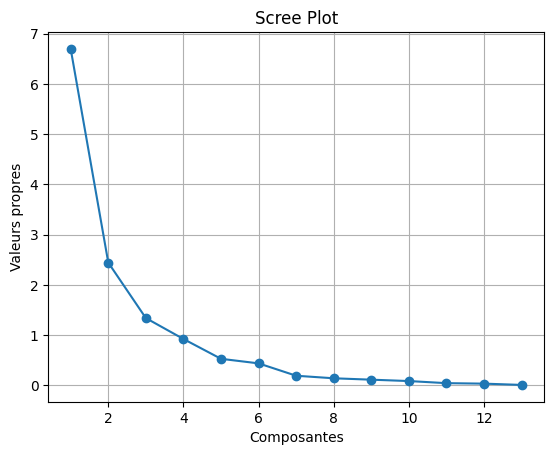

In [263]:
#Étape 6 – Scree Plot
plt.plot(range(1,len(valeurs_propres)+1), valeurs_propres, marker='o')
plt.xlabel("Composantes")
plt.ylabel("Valeurs propres")
plt.title("Scree Plot")
plt.grid()
plt.show()


In [264]:

composantes= pd.DataFrame(pca.components_,columns=df.columns,index=[f'PC{i+1}' for i in range(len(df.columns))])
print("\n Composantes principales")
display(composantes)


 Composantes principales


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PC1,0.337721,0.359860,0.125724,0.367182,0.371896,0.282050,-0.325126,0.259850,0.279251,0.358421,0.056275,0.010511,0.070735
PC2,-0.095129,-0.020163,0.048649,0.060811,0.078516,-0.306119,-0.017374,-0.303063,0.382620,-0.087649,0.577820,-0.226019,0.503403
PC3,-0.036982,0.085773,-0.115415,-0.042531,-0.061974,0.010261,-0.048675,-0.277109,0.145938,0.067666,-0.255814,0.795159,0.411639
PC4,0.007183,0.020424,0.959404,-0.021333,-0.035888,-0.175853,0.011336,-0.122543,-0.008973,-0.028633,-0.131394,0.091267,-0.069056
PC5,0.122741,-0.269116,0.183462,-0.270288,-0.229102,0.454466,-0.157380,0.430486,-0.190872,-0.188654,0.268832,0.077671,0.431691
PC6,0.535129,-0.082718,0.017875,0.138010,-0.008418,0.262023,0.717332,-0.127948,0.221262,-0.194710,0.009205,0.025039,-0.013609
PC7,-0.181092,0.166325,-0.004352,-0.107617,-0.065568,-0.396866,0.338887,0.713125,0.344126,0.011337,-0.020006,0.151824,0.027316
PC8,0.664317,-0.012279,-0.116804,-0.163513,-0.080058,-0.466182,-0.393376,0.046209,0.039486,-0.348473,-0.085332,0.033781,-0.078243
PC9,0.208725,0.600333,-0.010797,-0.406106,-0.357980,-0.025106,0.156618,-0.134348,-0.233702,0.395137,0.152842,-0.131603,0.090585
PC10,0.221489,-0.615379,-0.006837,-0.043375,-0.020558,-0.233226,0.064049,0.032292,-0.019873,0.702547,-0.066452,-0.040251,0.101772


# Que signifie le coude ?

Le coude = chute brutale → plateau

 après ce point, les composantes expliquent très peu

 donc on s’arrête au coude.

In [265]:
#Étape 7 – Interprétation des axes
compl = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(df.columns))],
    index=df.columns
)

print(compl.iloc[:, :2])


                    PC1       PC2
CO(GT)         0.337721 -0.095129
PT08.S1(CO)    0.359860 -0.020163
NMHC(GT)       0.125724  0.048649
C6H6(GT)       0.367182  0.060811
PT08.S2(NMHC)  0.371896  0.078516
NOx(GT)        0.282050 -0.306119
PT08.S3(NOx)  -0.325126 -0.017374
NO2(GT)        0.259850 -0.303063
PT08.S4(NO2)   0.279251  0.382620
PT08.S5(O3)    0.358421 -0.087649
T              0.056275  0.577820
RH             0.010511 -0.226019
AH             0.070735  0.503403


# **interprétation sémantique de chaque axe  ?**

grandes valeurs absolues (>|0.5|)

PC1 :

      fortes charges :

      CO, NOx, NO2, C6H6

  Axe pollution gazeuse
  

PC2 :

    fortes charges :

    T, RH, AH

 Axe conditions météorologiques



 Les variables dominantes de PC1 sont CO, NOx, NO2, C6H6 et les capteurs PT08, qui sont fortement corrélées entre elles ; cet axe représente donc le niveau global de pollution atmosphérique.


Les variables dominantes de PC2 sont T (température), RH (humidité relative) et AH (humidité absolue) ; cet axe correspond aux conditions météorologiques.

Ainsi, PC1 mesure l’intensité de la pollution, tandis que PC2 décrit le climat influençant la dispersion des polluants.

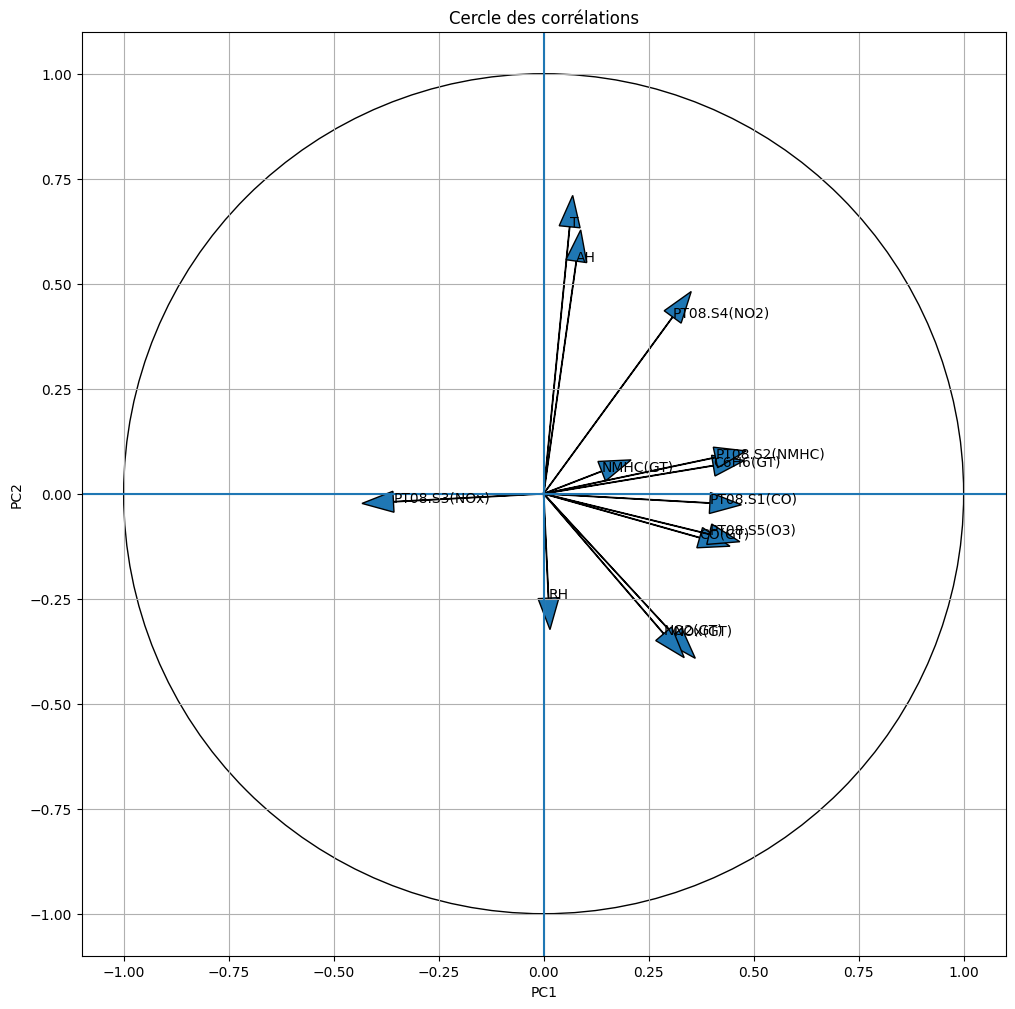

In [272]:
#Étape 8 – Cercle des corrélations
plt.figure(figsize=( 18 ,12))

for i in range(len(compl)):
    plt.arrow(0, 0,
              composantes.iloc[0, i] * 1.1,
              composantes.iloc[1, i] * 1.1,
              head_width=0.05)

    plt.text(composantes.iloc[0, i] * 1.1,
             composantes.iloc[1, i] * 1.1,
             df.columns[i])


circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_artist(circle)

plt.axhline(0)
plt.axvline(0)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle des corrélations")
plt.grid()
plt.show()

# **Interprétation Corrélations :**


Les variables CO, NOx, NO2, C6H6 et les capteurs PT08 sont fortement corrélées positivement entre elles, ce qui indique qu’elles augmentent ensemble et décrivent la pollution atmosphérique.


Les variables météorologiques (T, RH, AH) sont souvent opposées aux gaz polluants sur le cercle, montrant qu’une hausse des conditions climatiques favorise la dispersion de la pollution.


Les capteurs PT08 et les différents gaz polluants forment des groupes redondants, car ils mesurent pratiquement la même information.

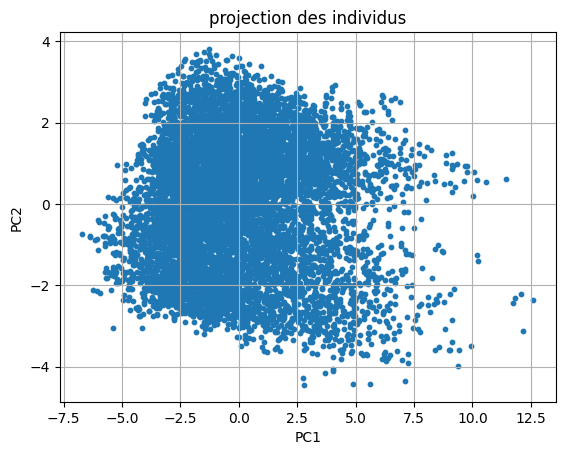

In [267]:
#Étape 9 – Projection des individus
plt.scatter(X_pca[:,0], X_pca[:,1], s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('projection des individus')
plt.grid()
plt.show()



# **Existe-t-il des observations extrêmes ?**

Les observations extrêmes correspondent à des situations atypiques de la qualité de l’air : celles éloignées sur l’axe PC1 indiquent des pics de forte pollution (fortes concentrations de gaz polluants), tandis que celles proches du centre représentent des niveaux moyens, et les écarts sur PC2 reflètent surtout des conditions météorologiques particulières influençant la dispersion des polluants.

In [268]:
#Étape 10 – Contributions
components = pd.DataFrame(compl)
contrib = components**2
print(contrib.iloc[:, :2])


                    PC1       PC2
CO(GT)         0.114056  0.009049
PT08.S1(CO)    0.129499  0.000407
NMHC(GT)       0.015806  0.002367
C6H6(GT)       0.134823  0.003698
PT08.S2(NMHC)  0.138307  0.006165
NOx(GT)        0.079552  0.093709
PT08.S3(NOx)   0.105707  0.000302
NO2(GT)        0.067522  0.091847
PT08.S4(NO2)   0.077981  0.146398
PT08.S5(O3)    0.128466  0.007682
T              0.003167  0.333876
RH             0.000110  0.051085
AH             0.005003  0.253415


# Interprétation

Plus grande contribution =
 variable la plus importante dans l’axe

In [271]:
#Étape 11 – cos²
cos2 = (X_pca ** 2) / np.sum(X_pca ** 2, axis=1).reshape(-1,1)
cos2_df = pd.DataFrame(cos2[:, :2], columns=["PC1", "PC2"])
print(cos2_df.head())


        PC1       PC2
0  0.064470  0.027134
1  0.079059  0.013098
2  0.010088  0.056961
3  0.000077  0.091641
4  0.101956  0.070287


# Interprétation

**cos² proche de 1 :**

      observation bien représentée

cos² faible :

      interprétation peu fiable

# **Une conclusion générale sur la structure de la pollution atmosphérique**

L’ACP montre que la structure des données de qualité de l’air est essentiellement bidimensionnelle.

Les deux premières composantes expliquent plus de 70% de la variance.

PC1 représente la pollution atmosphérique globale

PC2 représente les conditions météorologiques

Les gaz polluants sont fortement corrélés entre eux, tandis que la météo forme un second groupe distinct.
Certaines observations extrêmes correspondent à des pics de pollution.

Ainsi, l’ACP permet de réduire efficacement la dimension tout en conservant l’information principale.